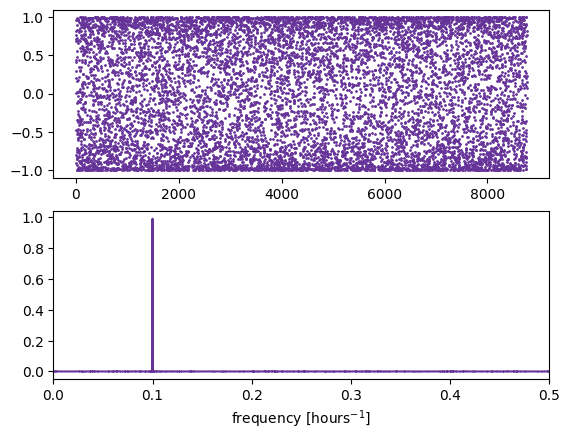

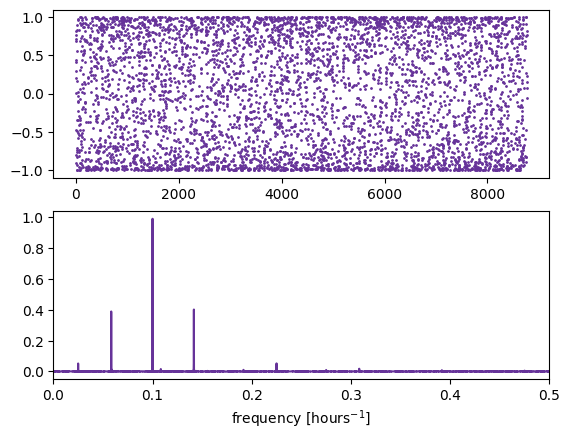

In [72]:
## Lomb Scargle I Problem Set Solutions

# Problem 3
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

# generate random data over 1 year
num_samples = 10_000
hours_per_year = 365.25 * 24
times = np.random.uniform(0, hours_per_year, size=num_samples)  # [units = hours]

period = 10  # [units = hours]
measurements = np.sin(2 * np.pi * times / period)

# compute the LombScargle periogoram
frequency, power = LombScargle(times, measurements).autopower()

fig, ax = plt.subplots(2, 1)
ax[0].scatter(times, measurements, color="rebeccapurple", s=1)
ax[1].plot(frequency, power, color="rebeccapurple")
ax[1].set_xlabel("frequency [hours$^{-1}$]")
ax[1].set_xlim(0, 0.5)

# mask out data taken during the day (pretending the day is 12am-12pm...)
nighttime_mask = times % 24 < 12

frequency_nightonly, power_nightonly = LombScargle(
    times[nighttime_mask], measurements[nighttime_mask]
).autopower()

fig, ax = plt.subplots(2, 1)
ax[0].scatter(
    times[nighttime_mask], measurements[nighttime_mask], color="rebeccapurple", s=1
)
ax[1].plot(frequency_nightonly, power_nightonly, color="rebeccapurple")
ax[1].set_xlabel("frequency [hours$^{-1}$]")
ax[1].set_xlim(0, 0.5)

# mask out data taken during the second half of the night (pretending the night is 12pm-12am...)
nighttime_mask = times % 24 < 12